In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler
!pip install matplotlib
import matplotlib.pyplot as plt

print(torch.__version__)
!pip install torch==1.8.0
!pip install opencv-python
import cv2
print(torch.__version__)

import torchvision.datasets as dset
import torchvision.transforms as T
from keras.datasets import cifar10
import numpy as np, numpy.linalg

USE_GPU = True
dtype = torch.float64 # We will be using float throughout this tutorial.

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

# Constant to control how frequently we print train loss.
print_every = 100
print('using device:', device)

1.8.0
1.8.0
using device: cpu


In [2]:
NUM_TRAIN = 49000
# The torchvision.transforms package provides tools for preprocessing data
# # and for performing data augmentation; here we set up a transform to
# # preprocess the data by subtracting the mean RGB value and dividing by the
# # standard deviation of each RGB value; we’ve hardcoded the mean and std.
# transform = T.Compose([
#                 T.ToTensor(),
#                 T.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
#             ])
# # We set up a Dataset object for each split (train / val / test); Datasets load
# # training examples one at a time, so we wrap each Dataset in a DataLoader which
# # iterates through the Dataset and forms minibatches. We divide the CIFAR-10
# # training set into train and val sets by passing a Sampler object to the
# # DataLoader telling how it should sample from the underlying Dataset.
# cifar10_train = dset.CIFAR10('./cs231n/datasets', train=True, download=True,
#                              transform=transform)
# loader_train = DataLoader(cifar10_train, batch_size=64,
#                           sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)))
# cifar10_val = dset.CIFAR10('./cs231n/datasets', train=True, download=True,
#                            transform=transform)
# loader_val = DataLoader(cifar10_val, batch_size=64,
#                         sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN, 50000)))
# cifar10_test = dset.CIFAR10('./cs231n/datasets', train=False, download=True,
#                             transform=transform)
# loader_test = DataLoader(cifar10_test, batch_size=64)

In [3]:
def _getAplus(A):
    eigval, eigvec = np.linalg.eig(A)
    Q = np.matrix(eigvec)
    xdiag = np.matrix(np.diag(np.maximum(eigval, 0)))
    return Q*xdiag*Q.T

def _getPs(A, W=None):
    W05 = np.matrix(W**.5)
    return  W05.I * _getAplus(W05 * A * W05) * W05.I

def _getPu(A, W=None):
    Aret = np.array(A.copy())
    Aret[W > 0] = np.array(W)[W > 0]
    return np.matrix(Aret)

def nearPD(A, nit=10):
    n = A.shape[0]
    W = np.identity(n) 
# W is the matrix used for the norm (assumed to be Identity matrix here)
# the algorithm should work for any diagonal W
    deltaS = 0
    Yk = A.copy()
    for k in range(nit):
        Rk = Yk - deltaS
        Xk = _getPs(Rk, W=W)
        deltaS = Xk - Rk
        Yk = _getPu(Xk, W=W)
    return Yk

In [4]:
# parameters, K = number of patches, P = pooling size, C = output dimension, f = filter size




class custom_multiclass_torch(torch.nn.Module):
    def __init__(self, N, P, C, K, f,a,b,c,beta, x_patches_train, x_patches_test):
        super(custom_multiclass_torch, self).__init__()

        self.N = N
        self.P = P
        self.C = C 
        self.K = K
        self.f = f 
        self.a = a
        self.b = b
        self.c = c
        self.beta = beta
        self.x_patches_train = x_patches_train
        self.x_patches_test = x_patches_test
        #initialize tensor array variables

#         self.Z_1_arr_train = [[None for j in range(C)]for i in range(K//P) ]
#         self.Z_1_arr_prime_train = [[None for j in range(C)]for i in range(K//P) ]
#         self.Z_2_arr_train = [[None for j in range(C)]for i in range(K//P) ]
#         self.Z_2_arr_prime_train = [[None for j in range(C)]for i in range(K//P) ]
#         self.Z_4_arr_train = [[None for j in range(C)]for i in range(K//P) ]
#         self.Z_4_arr_prime_train = [[None for j in range(C)]for i in range(K//P) ]

#         self.Z_arr_train = [[None for j in range(C)]for i in range(K//P) ]
#         self.Z_arr_prime_train = [[None for j in range(C)]for i in range(K//P) ]
        
        #print(len(self.Z_1_arr_train))
        # set random weights using kaising normalization
        
        self.Z_1_arr_train = nn.ParameterDict({  })
        self.Z_1_arr_prime_train = nn.ParameterDict({})
        self.Z_2_arr_train = nn.ParameterDict({})
        self.Z_2_arr_prime_train = nn.ParameterDict({})
        self.Z_4_arr_train = nn.ParameterDict({})
        self.Z_4_arr_prime_train = nn.ParameterDict({})
        self.Z_arr_train = {}
        self.Z_arr_prime_train = {}
        self.x_patches_train = x_patches_train
        self.x_patches_test = x_patches_test
        for i in range(1,K//P+1):
            for j in range(1,C+1):
                fan_in = f+1
                #w = torch.randn((f+1,f+1), device=device, dtype=dtype) * np.sqrt(2. / fan_in)
                #w.requires_grad = True
                #Z_arr[i][j] = w
                #w2 = torch.randn((f+1,f+1), device=device, dtype=dtype) * np.sqrt(2. / fan_in)
                #w2.requires_grad = True
                #Z_arr_prime_train[i][j] = w2 

                #self.test = torch.nn.Parameter(data = torch.randn((f,f), device = device, dtype = dtype), requires_grad = True)
#                 self.Z_1_arr_train[i][j] =  torch.nn.Parameter(data = torch.randn((f,f)).to(device), requires_grad = True) 
#                 self.Z_2_arr_train[i][j]  = torch.nn.Parameter(data = torch.randn((f,1)).to(device),  requires_grad = True) 
#                 self.Z_4_arr_train[i][j] = torch.nn.Parameter(data = torch.randn((1,1)).to(device),  requires_grad = True) 

#                 self.Z_1_arr_prime_train[i][j] = torch.nn.Parameter(data =torch.randn((f,f)).to(device),  requires_grad = True) 
#                 self.Z_2_arr_prime_train[i][j]  = torch.nn.Parameter(data =torch.randn((f,1)).to(device),  requires_grad = True) 
#                 self.Z_4_arr_prime_train[i][j] = torch.nn.Parameter(data = torch.randn((1,1)).to(device),  requires_grad = True) 

                
#                 self.Z_arr_train[i][j] = torch.vstack((torch.hstack((self.Z_1_arr_train[i][j], self.Z_2_arr_train[i][j])), torch.hstack((torch.transpose(self.Z_2_arr_train[i][j], 0, 1),self.Z_4_arr_train[i][j]))))
#                 self.Z_arr_prime_train[i][j] = torch.vstack((torch.hstack((self.Z_1_arr_prime_train[i][j], self.Z_2_arr_prime_train[i][j])), torch.hstack((torch.transpose(self.Z_2_arr_prime_train[i][j], 0, 1),self.Z_4_arr_prime_train[i][j]))))

                self.Z_1_arr_train[str(i)+','+str(j)] =  torch.nn.Parameter(data = torch.zeros((3*f**2,3*f**2), device = device, dtype = dtype), requires_grad = True)
                self.Z_1_arr_prime_train[str(i)+','+str(j)] =  torch.nn.Parameter(data = torch.zeros((3*f**2,3*f**2), device = device, dtype = dtype), requires_grad = True)
                self.Z_2_arr_train[str(i)+','+str(j)] =  torch.nn.Parameter(data = torch.zeros((3*f**2,1), device = device, dtype = dtype), requires_grad = True)
                self.Z_2_arr_prime_train[str(i)+','+str(j)] =  torch.nn.Parameter(data = torch.zeros((3*f**2,1), device = device, dtype = dtype), requires_grad = True)
                self.Z_4_arr_train[str(i)+','+str(j)] =  torch.nn.Parameter(data = torch.zeros((1,1), device = device, dtype = dtype), requires_grad = True)
                self.Z_4_arr_prime_train[str(i)+','+str(j)] =  torch.nn.Parameter(data = torch.zeros((1,1), device = device, dtype = dtype), requires_grad = True)
                
                self.Z_arr_train[str(i)+','+str(j)] = torch.vstack((torch.hstack((self.Z_1_arr_train[str(i)+','+str(j)], self.Z_2_arr_train[str(i)+','+str(j)])), torch.hstack((torch.transpose(self.Z_2_arr_train[str(i)+','+str(j)], 0, 1),self.Z_4_arr_train[str(i)+','+str(j)]))))
                self.Z_arr_prime_train[str(i)+','+str(j)] = torch.vstack((torch.hstack((self.Z_1_arr_prime_train[str(i)+','+str(j)], self.Z_2_arr_prime_train[str(i)+','+str(j)])), torch.hstack((torch.transpose(self.Z_2_arr_prime_train[str(i)+','+str(j)], 0, 1),self.Z_4_arr_prime_train[str(i)+','+str(j)]))))
                
               
    #self.Z_1_arr_train = torch.Tensor(self.Z_1_arr_train)
        
        
        
        #self.Z_arr_train = torch.vstack((torch.hstack((self.Z_1_arr_train, self.Z_2_arr_train), torch.hstack(torch.transpose(self.Z_2_arr_train),self.Z_4_arr_train))))
        #self.Z_arr_prime_train = torch.vstack((torch.hstack((self.Z_1_arr_prime_train, self.Z_2_arr_prime_train), torch.hstack(torch.transpose(self.Z_2_arr_prime_train),self.Z_4_prime_arr_train))))

    def forward(self, i):
        
        Z_1_new = {}
        Z_2_new = {}
        Z_4_new = {}
        Z_1_prime_new = {}
        Z_2_prime_new = {}
        Z_4_prime_new = {}
        
#         for key in self.Z_1_arr_train:
#             Z_1_new[key] = 0.5* (self.Z_1_arr_train[key]+ torch.transpose(self.Z_1_arr_train[key], 0, 1))
#         for key in self.Z_2_arr_train:
#             Z_2_new[key] = 0.5* (self.Z_2_arr_train[key]+ torch.transpose(self.Z_2_arr_train[key], 0, 1))
#         for key in self.Z_4_arr_train:
#             Z_4_new[key] = 0.5* (self.Z_4_arr_train[key]+ torch.transpose(self.Z_4_arr_train[key], 0, 1))
#         for key in self.Z_1_arr_train:
#             Z_1_prime_new[key] = 0.5* (self.Z_1_arr_prime_train[key]+ torch.transpose(self.Z_1_arr_prime_train[key], 0, 1))
#         for key in self.Z_2_arr_train:
#             Z_2_prime_new[key] = 0.5* (self.Z_2_arr_prime_train[key]+ torch.transpose(self.Z_2_arr_prime_train[key], 0, 1))
#         for key in self.Z_4_arr_train:
#             Z_4_prime_new[key] = 0.5* (self.Z_4_arr_prime_train[key]+ torch.transpose(self.Z_4_arr_prime_train[key], 0, 1))
        
        
        Z_new = {} 
        Z_new_prime = {}
        for key in self.Z_arr_train:
            #print(self.Z_arr_train[key].size(), self.Z_arr_train[key].T.size(), torch.eye(3*f**2+1).size())
            Z_new[key] = torch.matmul(self.Z_arr_train[key], self.Z_arr_train[key].T)+torch.eye(3*f**2+1)
            Z_1_new[key] = Z_new[key][:3*f**2,:3*f**2]
            Z_2_new[key] = Z_new[key][3*f**2,:3*f**2]
            Z_4_new[key] = Z_new[key][3*f**2,3*f**2]
        for key in self.Z_arr_prime_train:
            Z_new_prime[key] = torch.matmul(self.Z_arr_prime_train[key], self.Z_arr_prime_train[key].T)+torch.eye(3*f**2+1)
            Z_1_prime_new[key] = Z_new[key][:3*f**2,:3*f**2]
            Z_2_prime_new[key] = Z_new[key][3*f**2,:3*f**2]
            Z_4_prime_new[key] = Z_new[key][3*f**2,3*f**2]
        #Sigma_k = torch.mm(Sigma_k, Sigma_k.t())
        #Sigma_k.add_(torch.eye(512))

        
        ypred = torch.zeros((C))
        #print("index", i)
#         for t in range(1,C+1):
#             constant_part = 0
#             for k in range(1,K//P+1):
#                 constant_part += self.Z_4_arr_train[str(k)+","+str(t)] - self.Z_4_arr_prime_train[str(k)+","+str(t)]

#             constant_part *= c

#             linear_part = 0
#             for k in range(1,K//P+1):
#                 for l in range(1,P+1):
#                    # print(x_patches[i][(k-1)*P+ l].shape)
#                     linear_part += torch.matmul(torch.transpose(self.x_patches_train[i][(k-1)*P+ l-1].view(self.x_patches_train.size()[2], 1), 0,1),(self.Z_2_arr_train[str(k)+","+str(t)] - self.Z_2_arr_prime_train[str(k)+","+str(t)])).unsqueeze(0)
                    
#                     #print((self.Z_1_arr_train[str(k)+","+str(t)] - self.Z_1_arr_prime_train[str(k)+","+str(t)]).size())
# #                     print((k-1)*P+ l-1, self.x_patches_train[i][(k-1)*P+ l-1].size(), self.x_patches_train[i][(k-1)*P+ l-1].view(self.x_patches_train.size()[2], 1).size())
# #                     print((self.Z_2_arr_train[str(k)+","+str(t)] - self.Z_2_arr_prime_train[str(k)+","+str(t)]).size())
#             linear_part *= b//P

#             quadratic_part = 0
#             for k in range(1,K//P+1):
#                 for l in range(1,P+1):
#                     newpart = torch.matmul(torch.transpose(self.x_patches_train[i][(k-1)*P+ l-1].view(self.x_patches_train.size()[2], 1), 0, 1),(self.Z_1_arr_train[str(k)+","+str(t)] - self.Z_1_arr_prime_train[str(k)+","+str(t)]))
#                     newpart = torch.matmul(newpart, self.x_patches_train[i][(k-1)*P+ l-1].view(self.x_patches_train.size()[2],1))
#                     quadratic_part += newpart
#                     #print(torch.transpose(self.x_patches_train[i][(k-1)*P+ l-1].view(self.x_patches_train.size()[2], 1), 0, 1).size())
#                     #print("second part")
#                     #print((self.Z_1_arr_train[str(k)+","+str(t)] - self.Z_1_arr_prime_train[str(k)+","+str(t)]).size())
#                     #print("third")
#                     #print(self.x_patches_train[i][(k-1)*P+ l-1].view(self.x_patches_train.size()[2],1).size())
#             quadratic_part *= a//P
            
#             #print(quadratic_part, linear_part, constant_part)

#             ypred[t-1] = quadratic_part + linear_part + constant_part



        for t in range(1,C+1):
            constant_part = 0
            for k in range(1,K//P+1):
                constant_part += Z_4_new[str(k)+","+str(t)] - Z_4_prime_new[str(k)+","+str(t)]

            constant_part *= c

            linear_part = 0
            for k in range(1,K//P+1):
                for l in range(1,P+1):
                   # print(x_patches[i][(k-1)*P+ l].shape)
                    #print(Z_2_new[str(k)+","+str(t)], Z_2_prime_new[str(k)+","+str(t)])
                    linear_part += torch.matmul(torch.transpose(self.x_patches_train[i][(k-1)*P+ l-1].view(self.x_patches_train.size()[2], 1), 0,1),(Z_2_new[str(k)+","+str(t)] - Z_2_prime_new[str(k)+","+str(t)]))

                    #print((self.Z_1_arr_train[str(k)+","+str(t)] - self.Z_1_arr_prime_train[str(k)+","+str(t)]).size())
#                     print((k-1)*P+ l-1, self.x_patches_train[i][(k-1)*P+ l-1].size(), self.x_patches_train[i][(k-1)*P+ l-1].view(self.x_patches_train.size()[2], 1).size())
#                     print((self.Z_2_arr_train[str(k)+","+str(t)] - self.Z_2_arr_prime_train[str(k)+","+str(t)]).size())
            linear_part *= b/P

            quadratic_part = 0
            for k in range(1,K//P+1):
                for l in range(1,P+1):
                    newpart = torch.matmul(torch.transpose(self.x_patches_train[i][(k-1)*P+ l-1].view(self.x_patches_train.size()[2], 1), 0, 1),(Z_1_new[str(k)+","+str(t)] - Z_1_prime_new[str(k)+","+str(t)]))
                    newpart = torch.matmul(newpart, self.x_patches_train[i][(k-1)*P+ l-1].view(self.x_patches_train.size()[2],1))
                    quadratic_part += newpart
                    #print(torch.transpose(self.x_patches_train[i][(k-1)*P+ l-1].view(self.x_patches_train.size()[2], 1), 0, 1).size())
                    #print("second part")
                    #print((self.Z_1_arr_train[str(k)+","+str(t)] - self.Z_1_arr_prime_train[str(k)+","+str(t)]).size())
                    #print("third")
                    #print(self.x_patches_train[i][(k-1)*P+ l-1].view(self.x_patches_train.size()[2],1).size())
            quadratic_part *= a/P

            #print(quadratic_part.size(), linear_part.size(), constant_part.size())

            ypred[t-1] = quadratic_part + linear_part + constant_part
        #print(ypred)

        
        epsilon = 1e-9
        
        #print(ypred)
        #print(ypred)
        #ypredmin = torch.min(ypred)
        #ypred = ypred + ypredmin + epsilon
        #ypred = torch.log(ypred)
        
        #ypredmax  = torch.max(ypred)
        #ypred = ypred - ypredmax
        #ypred = torch.log(ypred)
        #print(ypred)
        softmaxLayer = nn.Softmax(dim  = -1)
        #print(ypred)
        ypred = softmaxLayer(ypred)
        #ypred = softmaxLayer(ypred.view(1, ypred.size()[0]))
        #print(ypred)
        #return ypred.view(ypred.size()[1])
        
        
        
        return ypred

    
    
    def customloss(self, Yhat, y):
         #loss = nn.MSELoss()
        #objective1 = loss(Yhat, Y)
        objective1 = 0.5 * torch.norm(Yhat - y)**2 *N/y.shape[0]

        objective2 = 0 

        for i in range(1,K//P+1):
            for j in range(1,C+1):
                objective2 += self.Z_4_arr_train[str(i)+","+str(j)] + self.Z_4_arr_prime_train[str(i)+","+str(j)]
            
        objective = objective1+objective2

        return objective
            
                  

                    
 





In [5]:
# print(cifar10_train)

In [6]:






# # (X_train, y_train), (X_test, y_test) = cifar10.load_data()

# #idx = np.arange(len(X_train))
# #np.random.shuffle(idx)

# #subset_x_train = x_train[:int(.10*len(idx))]

# # X_val = X_test[:X_test.shape[0]//2,:,:,:]
# # X_test = X_test[X_test.shape[0]//2:,:,:,:]

# # y_val = y_test[:y_test.shape[0]//2,:]
# # y_test = y_test[:y_test.shape[0]//2,:]
# # print(y_val)

# #print(X_train.shape, X_val.shape, X_test.shape)
# f = 4
# P = 2
# C = 10
# a,b,c = 1,2,3
# beta = 1

# #X_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_train])
# #X_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_test])
# #X_val = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_val])

# #[1 by 4] times [4 by 4] times [4 by 1] = [1 by 1] (scalar)

# # train_images = X_train.astype(np.float64)
# # train_labels = y_train.astype(np.float64)
# # test_images = X_test.astype(np.float64)
# # test_labels = y_test.astype(np.float64)
# # val_images = X_val.astype(np.float64)
# # val_labels = y_val.astype(np.float64)

# #train_images_v2 = np.swapaxes(train_images.reshape(train_images.shape[0], 3, 32, 32), 2, 3)
# #test_images_v2 = np.swapaxes(test_images.reshape(test_images.shape[0], 3, 32, 32), 2, 3)
# #val_images_v2 = np.swapaxes(val_images.reshape(val_images.shape[0],3, 32, 32), 2, 3)

# print(train_images_v2.shape, test_images_v2.shape)
# patches_train = torch.nn.functional.unfold(torch.tensor(train_images_v2), kernel_size=(f,f), stride=f, padding=0)
# patches_test = torch.nn.functional.unfold(torch.tensor(test_images_v2), kernel_size=(f, f), stride=f, padding=0)
# patches_val = torch.nn.functional.unfold(torch.tensor(val_images_v2), kernel_size=(f,f), stride=f, padding=0)

# print(patches_train.shape)


# patches_train = patches_train.permute(0,2,1)
# patches_test = patches_test.permute(0,2,1)
# patches_val = patches_val.permute(0,2,1)

# N = X_train.shape[0]
# K = patches_train.shape[1]

# print(K, P, C)
# Yhat_train =  None
# Yhat_test = None



In [7]:






(X_train, y_train), (X_test, y_test) = cifar10.load_data()

#idx = np.arange(len(X_train))
#np.random.shuffle(idx)

#subset_x_train = x_train[:int(.10*len(idx))]
X_train = X_train[:1000,:,:,:]
y_train = y_train[:1000]
X_test = X_test[:200,:,:,:]
y_test = y_test[:200]

X_val = X_test[:X_test.shape[0]//2,:,:,:]
X_test = X_test[X_test.shape[0]//2:,:,:,:]

y_val = y_test[:y_test.shape[0]//2,:]
y_test = y_test[:y_test.shape[0]//2,:]
#print(y_val)

#print(X_train.shape, X_val.shape, X_test.shape)
f = 4
P = 2
C = 10
a,b,c = 1,2,3
beta = 1

#X_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_train])
#X_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_test])
#X_val = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_val])

#[1 by 4] times [4 by 4] times [4 by 1] = [1 by 1] (scalar)

#0 0 0 1 0
#123123123 111231241 -12342423423424 -234234234 12312312



train_images = X_train.astype(np.float64)
train_labels = y_train.astype(np.float64)
test_images = X_test.astype(np.float64)
test_labels = y_test.astype(np.float64)
val_images = X_val.astype(np.float64)
val_labels = y_val.astype(np.float64)


mean_image = np.mean(train_images, axis = 0)
train_images -= mean_image
test_images -= mean_image
val_images -= mean_image



train_images_v2 = np.swapaxes(train_images.reshape(train_images.shape[0], 3, 32, 32), 2, 3)
test_images_v2 = np.swapaxes(test_images.reshape(test_images.shape[0], 3, 32, 32), 2, 3)
val_images_v2 = np.swapaxes(val_images.reshape(val_images.shape[0],3, 32, 32), 2, 3)

print(train_images_v2.shape, test_images_v2.shape)
patches_train = torch.nn.functional.unfold(torch.tensor(train_images_v2), kernel_size=(f,f), stride=f, padding=0)
patches_test = torch.nn.functional.unfold(torch.tensor(test_images_v2), kernel_size=(f, f), stride=f, padding=0)
patches_val = torch.nn.functional.unfold(torch.tensor(val_images_v2), kernel_size=(f,f), stride=f, padding=0)

print(patches_train.shape)


patches_train = patches_train.permute(0,2,1)
patches_test = patches_test.permute(0,2,1)
patches_val = patches_val.permute(0,2,1)

N = X_train.shape[0]
K = patches_train.shape[1]

print(K, P, C)
Yhat_train =  None
Yhat_test = None



(1000, 3, 32, 32) (100, 3, 32, 32)
torch.Size([1000, 48, 64])
64 2 10


In [8]:
# def train(model, loss_fn, optimizer, epochs=1):
#     model = model.to(device=device) # move the model parameters to CPU/GPU
    
#     loss_train = []
#     accuracies_train = []
#     accuracies_val = []

#     for e in range(epochs):
#         print(train_labels.shape)
#         for t, (x, y) in enumerate(loader_train):
#             model.train() # put model to training mode
#             x = x.to(device=device, dtype=dtype) # move to device, e.g. GPU
#             y = y.to(device=device, dtype=torch.long)

#             scores = model(t)
            
#             # print(scores.shape)
#             # input()

#             #loss = F.cross_entropy(scores, y)
#             y_hot = torch.zeros(scores.size(), dtype = dtype)
            
#             y_hot[y] = 1
            
#             #currect class = 4
#             #0 0 0 0 1
            
#             #0.1 0.5 0.4
#             #0 0 1
#             #1
#             #print(scores, y_hot)

#             loss = loss_fn(scores, y_hot)
#             loss_train.append(loss)

#             # Zero out all of the gradients for the variables which the optimizer
#             # will update.
#             optimizer.zero_grad()

#             # This is the backwards pass: compute the gradient of the loss with
#             # respect to each  parameter of the model.
#             loss.backward()

#             # Actually update the parameters of the model using the gradients
#             # computed by the backwards pass.
#             optimizer.step()

#             if t % 10 == 0:
#                 print('Iteration %d, loss = %.4f' % (t, loss.item()))
#                 accuracies_train.append(check_accuracy(loader_train, model, segment = "train"))
#                 accuracies_val.append(check_accuracy(loader_val, model, segment = "val"))
                

#     return loss_train, accuracies_train, accuracies_val


In [9]:
def train(model, loss_fn, optimizer, epochs=1):
    model = model.to(device=device) # move the model parameters to CPU/GPU
    
    loss_train = []
    accuracies_train = []
    accuracies_val = []

    for e in range(epochs):
        #print(train_labels.shape)
        for t, (x, y) in enumerate(zip(train_images, train_labels)):
            model.train() # put model to training mode
            #x = x.to(device=device, dtype=dtype) # move to device, e.g. GPU
            #y = y.to(device=device, dtype=torch.long)

            scores = model(t)
            
            # print(scores.shape)
            # input()

            #loss = F.cross_entropy(scores, y)
            y_hot = torch.zeros(scores.size(), dtype = dtype)
            
            y_hot[y] = 1
            
            #currect class = 4
            #0 0 0 0 1
            
            #0.1 0.5 0.4
            #0 0 1
            #1
            #print(scores, y_hot)

            loss = loss_fn(scores, y_hot)
            loss_train.append(loss)

            # Zero out all of the gradients for the variables which the optimizer
            # will update.
            optimizer.zero_grad()

            # This is the backwards pass: compute the gradient of the loss with
            # respect to each  parameter of the model.
            loss.backward()

            # Actually update the parameters of the model using the gradients
            # computed by the backwards pass.
            optimizer.step()

            if t % 100 == 0:
                print('Iteration %d, loss = %.4f' % (t, loss.item()))
                accuracies_train.append(check_accuracy(X_train, y_train, model, segment = "train"))
                accuracies_val.append(check_accuracy(X_val, y_val, model, segment = "val"))
                

    return loss_train, accuracies_train, accuracies_val

                
           

In [10]:
# def check_accuracy(loader, model, segment = "train"):
#     if segment=='train':
#         print('Checking accuracy on train set')
#     elif segment == "val":
#         print('Checking accuracy on val set')
#     else:
#         print('Checking accuracy on test set')
#     num_correct = 0
#     num_samples = 0
#     model.eval()  # set model to evaluation mode
#     with torch.no_grad():
#         for t, (x, y) in enumerate(loader):
#             x = x.to(device=device, dtype=dtype)
#             y = y.to(device=device, dtype=torch.long)
#             scores = model(t)
#             print(scores)
#             print(scores.shape)
#             print(y)
#             max_score_idx = torch.argmax(scores)
#             num_correct += int(max_score_idx == y)
#             num_samples += 1
#         acc = float(num_correct) / num_samples
#         print('Got %d / %d correct (%.2f)'% (num_correct, num_samples, 100 * acc))
#         return acc

In [11]:
def check_accuracy(X, Y, model, segment = "train"):
    if segment=='train':
        print('Checking accuracy on train set')
    elif segment == "val":
        print('Checking accuracy on val set')
    else:
        print('Checking accuracy on test set')
    num_correct = 0
    num_samples = 0
    model.eval()  # set model to evaluation mode
    with torch.no_grad():
        for t, (x, y) in enumerate(zip(X, Y)):
            scores = model(t)
            #print(scores)
            #print(scores.shape)
            #print(y)
            max_score_idx = torch.argmax(scores)
            y = torch.tensor(y)
            addvalue = 1 if (max_score_idx == y) else 0
            num_correct += addvalue
            num_samples += 1
        acc = float(num_correct) / num_samples
        print('Got %d / %d correct (%.2f)'% (num_correct, num_samples, 100 * acc))
        return acc

In [12]:
model = custom_multiclass_torch(N, P, C, K, f,a,b,c,beta, patches_train, patches_test)


In [13]:
count = 0
for param in model.parameters():
    #print(param.shape)
    count += 1
print(count)

1920


In [14]:
loss_fn = model.customloss
# adamvar1 = 1
# adamvar2 = 0

#print(model.parameters())
optimizer = optim.Adam(model.parameters(), lr=1e-4)



#1 by 16 
# 4 by 4
# 16 by 1
loss_train, accuracies_train, accuracies_val = train(model, loss_fn, optimizer, epochs=1)



Iteration 0, loss = 45.0000
Checking accuracy on train set
Got 102 / 1000 correct (10.20)
Checking accuracy on val set
Got 10 / 100 correct (10.00)
Iteration 100, loss = 38.6000
Checking accuracy on train set
Got 102 / 1000 correct (10.20)
Checking accuracy on val set
Got 10 / 100 correct (10.00)
Iteration 200, loss = 32.2000
Checking accuracy on train set
Got 102 / 1000 correct (10.20)
Checking accuracy on val set
Got 10 / 100 correct (10.00)
Iteration 300, loss = 25.8000
Checking accuracy on train set
Got 102 / 1000 correct (10.20)
Checking accuracy on val set
Got 10 / 100 correct (10.00)
Iteration 400, loss = 19.4000
Checking accuracy on train set
Got 102 / 1000 correct (10.20)
Checking accuracy on val set
Got 10 / 100 correct (10.00)
Iteration 500, loss = 13.0000
Checking accuracy on train set
Got 102 / 1000 correct (10.20)
Checking accuracy on val set
Got 10 / 100 correct (10.00)
Iteration 600, loss = 6.6000
Checking accuracy on train set
Got 102 / 1000 correct (10.20)
Checking ac

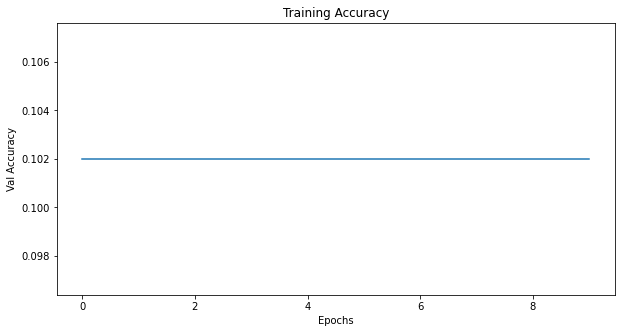

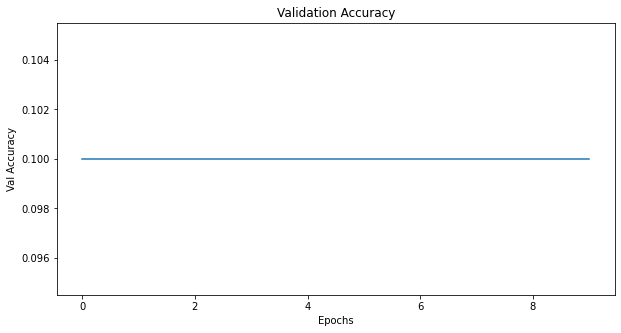

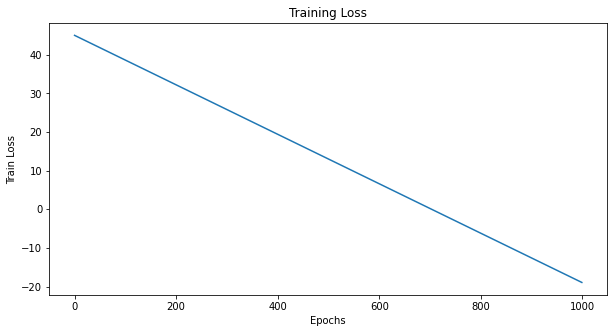

In [15]:


plt.figure(figsize=(10,5))
plt.title('Training Accuracy')
#print(accuracies_train)
plt.plot(accuracies_train)
plt.xlabel('Epochs')
plt.ylabel('Val Accuracy')
#plt.legend()
plt.show()


plt.figure(figsize=(10,5))
plt.title('Validation Accuracy')
#print(accuracies_val)
plt.plot(accuracies_val)
plt.xlabel('Epochs')
plt.ylabel('Val Accuracy')
#plt.legend()
plt.show()



plt.figure(figsize=(10,5))
plt.title('Training Loss')
#print(loss_train)
plt.plot(loss_train)
plt.xlabel('Epochs')
plt.ylabel('Train Loss')
#plt.legend()
plt.show()

In [16]:
check_accuracy(X_test, model, segment = "test")


TypeError: check_accuracy() missing 1 required positional argument: 'model'